<a href="https://colab.research.google.com/github/grosetta/rdkit_study/blob/main/%E5%AE%9A%E9%87%8F%E8%AF%84%E4%BC%B0%E7%B1%BB%E8%8D%AF%E6%80%A7%EF%BC%88QED%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#文件头代码
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks/python_package/")

Mounted at /content/drive


In [2]:
from rdkit import rdBase, Chem
from rdkit.Chem import PandasTools, QED, Descriptors, rdMolDescriptors
%matplotlib inline
print(rdBase.rdkitVersion)

2022.09.4


In [3]:
df = PandasTools.LoadSDF('/content/drive/My Drive/data/molecules.sdf')
len(df)

200

In [4]:
#计算QED
df['QED'] = df.ROMol.map(QED.qed)
df['QED'].head()

In [5]:
#定义Lipinsky
def rule_of_five(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    psa = Descriptors.TPSA(m)
    if (mw <= 500 and logp <= 5 and hbd <= 5 and hba <= 10):
        return 1
    else:
        return 0

In [6]:
df['Lipinski'] = df.ROMol.map(rule_of_five)

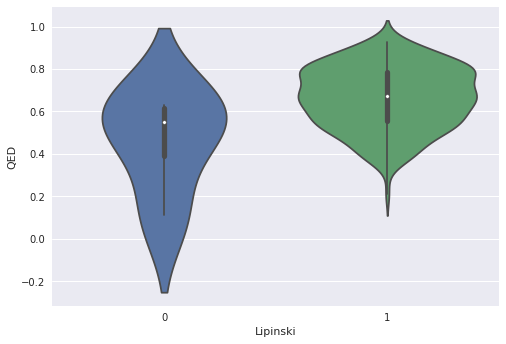

In [7]:
import matplotlib as mpl
import seaborn as sns
with mpl.style.context('seaborn'):
    sns.violinplot(x='Lipinski', y='QED', data=df)